In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [10]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [11]:
# Exploratory
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


In [12]:
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year)

2016-08-23


In [13]:
precipitation_all = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year).\
    order_by(Measurement.date).all()
precipitation_all_df = pd.DataFrame(precipitation_all)
precipitation_all_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [14]:
precipitation_all_df = pd.DataFrame(precipitation_all, columns = ['Precipitation', 'Dates'])
precipitation_all_df.set_index('Dates').head()

,Precipitation
Dates,
0.08,2016-08-24
2.15,2016-08-24
2.28,2016-08-24
NaN,2016-08-24
1.22,2016-08-24


TypeError: no numeric data to plot

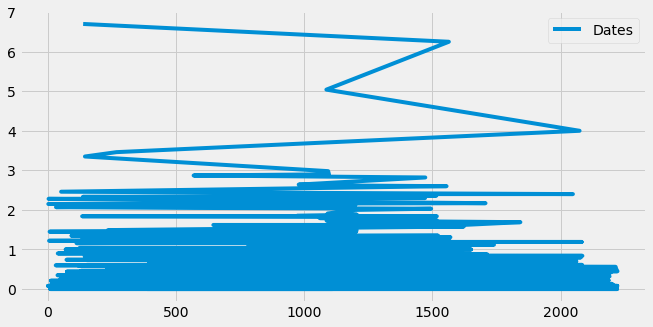

In [17]:
precipitation_all_df = pd.DataFrame(precipitation_all, columns = ['Precipitation', 'Dates'])
precipitation_all_df.set_index('Dates')

dates_df = precipitation_all_df.sort_values(by = 'Dates')

dates_df.plot(figsize=(10,5))

dates_df.plot(x = 'Dates' , grid = True)


plt.title("Precipitation Analysis" , size = 15)
plt.show()

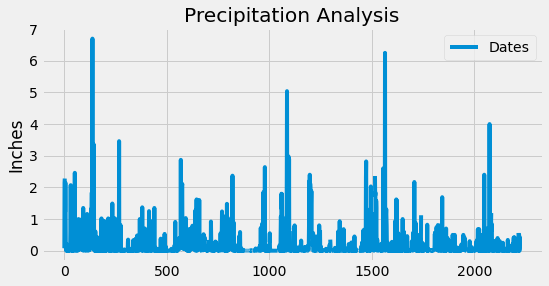

In [15]:
ax = precipitation_all_df.plot(figsize=(8,4))
ax.set_title("Precipitation Analysis")
ax.set_ylabel('Inches')
plt.show()

In [16]:
precipitation_all_df.describe()

,Dates
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
#Station

In [18]:
station_total = session.query(func.count(Measurement.station)).all()
station_total

[(19550)]

In [23]:
active_stations = session.query( Measurement.station , func.count(Measurement.station)).group_by( Measurement.station ).\
order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
temp_act_station = session.query(func.min(Measurement.tobs), 
                                 func.max(Measurement.tobs),\
                                func.avg(Measurement.tobs)).\
                                filter(Measurement.station == 'USC00519281' ).all()


print(temp_act_station)

[(54.0, 85.0, 71.66378066378067)]


In [25]:
station_analysis = session.query(Measurement.tobs).\
                                filter(Measurement.station== 'USC00519281').\
                                filter(Measurement.date >= one_year).\
                                order_by(Measurement.date.desc()).all()
station_df = pd.DataFrame(station_analysis)
station_df.head()

,tobs
0,79.0
1,76.0
2,76.0
3,77.0
4,77.0


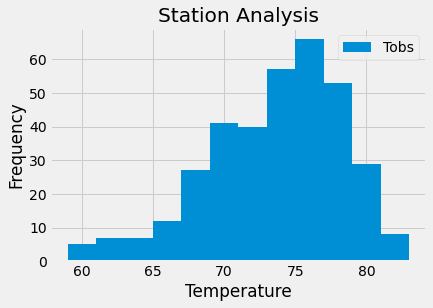

In [27]:
plt.hist(station_df['tobs'], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Station Analysis")
plt.legend(["Tobs"])
plt.show()

In [ ]:
# Close Session
session.close()